In [2]:
from music21 import *
import os.path
from math import floor
import numpy as np
from matplotlib import pyplot as plt
# import scipy as sp
from scipy.spatial.distance import pdist, cdist, squareform

Delete from `acemasiran--beste--zencir--hayatin_cumleye--dellalzade.xml` the key tag and name it `acemasiran--beste--zencir--hayatin_cumleye--dellalzade_2.xml`

Change `pathToScores` to your path to the folder containing the scores


In [3]:
makamScore = 'acemasiran--beste--zencir--hayatin_cumleye--dellalzade_2.xml'
pathToScores = '/home/ljoglar/Documents/MTG/AMP_LAB/SymbTr/MusicXML/'
score = converter.parse(pathToScores + makamScore)

In [4]:
def getIntervalInTones(note1, note2):
    accidentalsMap = {
     'double-flat': -1,
     'double-slash-flat':-8/9,
     'flat':-5/9,
     'slash-flat':-4/9,
     'quarter-flat':-1/9,
     'half-flat' : -1/9,
     'double-sharp':1,
     'quarter-sharp':1/9,
     'half-sharp': 1/9,
     'sharp':4/9,
     'slash-quarter-sharp':5/9,
     'slash-sharp':8/9}
    noteObj1 = note.Note(note1.step + str(note1.octave))
    noteObj2 = note.Note(note2.step + str(note2.octave))
    inter = interval.notesToChromatic(noteObj1, noteObj2)
    tonesAccidental1 = 0
    if note1.pitch.accidental is not None:
        tonesAccidental1 = accidentalsMap[note1.pitch.accidental.name]
    tonesAccidental2 = 0
    if note2.pitch.accidental is not None:
        tonesAccidental2 = accidentalsMap[note2.pitch.accidental.name]
    totalTones = - tonesAccidental1 + (inter.semitones/2) + tonesAccidental2
    return floor(totalTones * 100) / 100;


To test it, using `D sharp` and `F slash-quarter-sharp` the interval in tones should be 1.6112 ish

I'll create a `D sharp` and we can get the `F slash-quarter-sharp` from the note in position `102` of the score.

In [5]:
notes = score.parts[0].flat.notes.stream()
print(len(notes))

589


In [6]:
n1 = note.Note('D5')
n1.pitch.accidental = pitch.Accidental('sharp')
print(n1)

<music21.note.Note D#>


In [7]:
print(notes[102])
print(notes[102].pitch)
print(notes[102].pitch.accidental.name)
print(notes[102].fullName)
print(notes[102].quarterLength)

<music21.note.Note F>
F5
slash-quarter-sharp
F-slash-quarter-sharp in octave 5 Eighth Note
0.5


In [8]:
print(getIntervalInTones(n1, notes[102]))
print(getIntervalInTones(notes[102], n1))

1.61
-1.62


In [9]:
#measures = score.parts[0].flat.measures.stream()


In [10]:
zs = []
for i in range(len(notes)):
    if i is 0:
        zs.append([0, notes[i].quarterLength])
    else:
        zs.append([getIntervalInTones(notes[i-1], notes[i]), notes[i].quarterLength])
        
#print(zs)

d = {}
r = range(8,10)
for j in r:
    d[j] = {}
    for i in range(len(zs)-j):
        z = str(zs[i:i+j])
        if z in d[j]:
            d[j][z] += 1
        else:
            d[j][z] = 1


#for j in range(2,10):
    #for i, v in d.items():
        #print(v)

max(d[j][i] for j in r for (i, v) in d[j].items())

4

In [11]:
phrases = []
phrase_lenght = 5
for i in range(len(zs) - phrase_lenght):
        phrases.append(zs[i : i + phrase_lenght])

inter = []
dur = []
for ind, phrase in enumerate(phrases):
    inter.append([])
    dur.append([])
    for n in phrase:
        inter[ind].append(n[0])
        dur[ind].append(n[1])
print(len(inter))
print(len(dur))

# dist = cdist(inter, dur, 'euclidean')

dist_inter = pdist(inter, 'euclidean')
dist_dur = pdist(dur, 'euclidean')

584
584


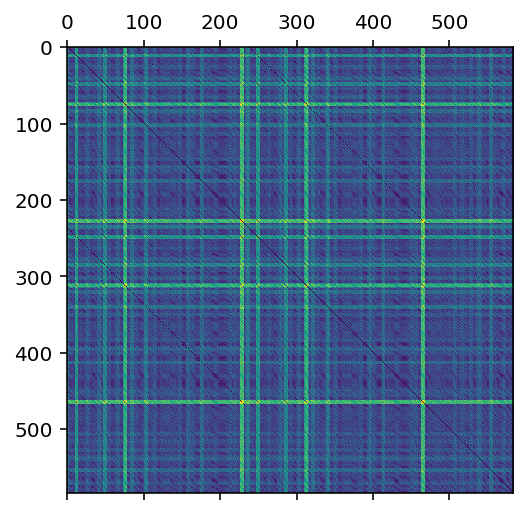

In [14]:
plt.matshow(squareform(dist_inter))
plt.savefig('inter.png', dpi=1000)

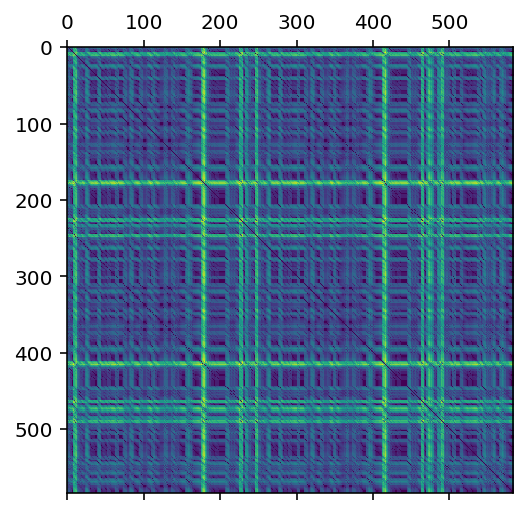

In [15]:
plt.matshow(squareform(dist_dur))
plt.savefig('dur.png', dpi=1000)

In [16]:
# print(phrases)

In [78]:
for i in range(100):
    x = np.random.choice(notes, 2, replace = False)
    a, b = x[0], x[1]
    print(a, b)
    print(getIntervalInTones(a, b))
    print('\n')

<music21.note.Note D> <music21.note.Note F>
-4.5


<music21.note.Note F> <music21.note.Note F>
0.0


<music21.note.Note C> <music21.note.Note C#>
0.44


<music21.note.Note F> <music21.note.Note B->
-3.56


<music21.note.Note C> <music21.note.Note A>
-1.5


<music21.note.Note F> <music21.note.Note E>
-0.5


<music21.note.Note A> <music21.note.Note E>
3.5


<music21.note.Note E> <music21.note.Note E>
0.0


<music21.note.Note D> <music21.note.Note C>
-1.0


<music21.note.Note B-> <music21.note.Note F>
3.55


<music21.note.Note G> <music21.note.Note B->
1.44


<music21.note.Note A> <music21.note.Note E>
-2.5


<music21.note.Note C> <music21.note.Note E>
-4.0


<music21.note.Note D> <music21.note.Note B->
-8.06


<music21.note.Note A> <music21.note.Note A>
0.0


<music21.note.Note A> <music21.note.Note F>
-2.0


<music21.note.Note F> <music21.note.Note F>
0.0


<music21.note.Note D> <music21.note.Note A>
3.5


<music21.note.Note C> <music21.note.Note G>
-2.5


<music21.note.Note C> <music21

In [12]:
floor(21.123 * 100) / 100

21.12

In [51]:
d=[[1,2], [3,4], [5,6]]
str(d)

'[[1, 2], [3, 4], [5, 6]]'